In [44]:
import matplotlib.pyplot as plt
import numpy as np
import util

from linear_model import LinearModel

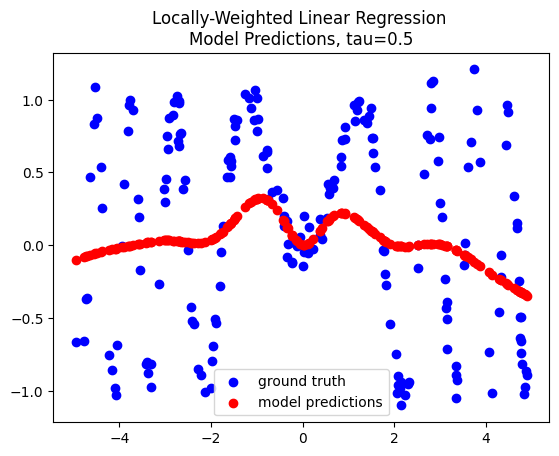

In [45]:
def main(tau, train_path, eval_path):
    """Problem 5(b): Locally weighted regression (LWR)

    Args:
        tau: Bandwidth parameter for LWR.
        train_path: Path to CSV file containing dataset for training.
        eval_path: Path to CSV file containing dataset for evaluation.
    """
    # Load training set
    x_train, y_train = util.load_dataset(train_path, add_intercept=False)

    #Load validation set
    x_eval, y_eval = util.load_dataset(eval_path, add_intercept=False)

    clf = LocallyWeightedLinearRegression(tau=tau)
    clf.fit(x=x_train, y=y_train)
    y_preds = clf.predict(x_eval)

    plt.scatter(x_eval, y_eval, label='ground truth', c='b')
    plt.scatter(x_eval, y_preds, label='model predictions', c='r', marker='o')
    plt.legend()
    plt.title(f"Locally-Weighted Linear Regression \nModel Predictions, tau={tau}")
    plt.show()


class LocallyWeightedLinearRegression(LinearModel):
    """Locally Weighted Regression (LWR).

    Example usage:
        > clf = LocallyWeightedLinearRegression(tau)
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def __init__(self, tau):
        super(LocallyWeightedLinearRegression, self).__init__()
        self.tau = tau
        self.x = None
        self.y = None

    def fit(self, x, y):
        """Fit LWR by saving the training set.

        """
        self.no_examples = x.shape[0]
        self.no_features = x.shape[1]
        self.x = x
        self.y = y
        

    def predict(self, x):
        """Make predictions given inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            y_preds: Predicted y values of shape (m,).
        """

        y_preds = []

        #Iterate over validation set
        for i, x_p in enumerate(x):
            #Calculate weight matrix, which is diagonal
            W = np.zeros((self.no_examples, self.no_examples))

            #Iterate over training set
            for j, x_i in enumerate(self.x):
                arg = (np.linalg.norm(x_i - x_p))**2
                W[j][j] = np.exp(-arg / (2*self.tau))

            #Closed-form solution for theta
            self.theta = np.linalg.inv(self.x.T @ W @ self.x) @ self.x.T @ W @ self.y

            y_pred = np.dot(x_p, self.theta)
            y_preds.append(y_pred)

        return y_preds


tau = 0.5
train_path = 'data/ds5_train.csv'
eval_path = 'data/ds5_valid.csv'

main(
    tau=tau,
    train_path=train_path,
    eval_path=eval_path
)